In [1]:
!pip install seaborn --quiet

You should consider upgrading via the 'C:\Users\Razaq\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
!pip install xeus-python

You should consider upgrading via the 'C:\Users\Razaq\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [1]:
import os
import pickle
import shutil
import warnings
import random as r
import numpy as np
import pandas as pd
import seaborn as sns

# Matplotlib Imports
import matplotlib  
import matplotlib.pyplot as plt
matplotlib.use(u'nbAgg')
%matplotlib inline

import multiprocessing
from multiprocessing import Process

# This is used for file operations
import codecs  

In [7]:
data_path = "malware-classification"

source = os.path.join(data_path, 'train') 
byte_destination = os.path.join(data_path, 'byteFiles')
asm_destination = os.path.join(data_path, 'asmFiles')


if not os.path.isdir(byte_destination):
    os.makedirs(byte_destination)

if os.path.isdir(source):
    os.rename(source, asm_destination)
    source = asm_destination
    all_files = os.listdir(source)
    for file in all_files:
        if (file.endswith("bytes")):
            shutil.move( os.path.join(asm_destination, file), byte_destination)

In [7]:
data_path = "malware-classification"

byte_destination = os.path.join(data_path, 'bytes')

print(byte_destination)

malware-classification\bytes


In [3]:
train_label = os.path.join(data_path, 'trainLabels.csv') 
Y = pd.read_csv(train_label)
Y.head()


,Id,Class
0,01kcPWA9K2BOxQeS5Rju,1
1,04EjIdbPV5e1XroFOpiN,1
2,05EeG39MTRrI6VY21DPd,1
3,05rJTUWYAKNegBk2wE8X,1
4,0AnoOZDNbPXIr2MRBSCJ,1


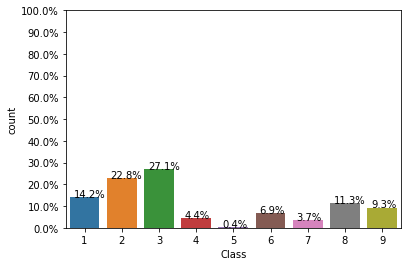

In [4]:
total = len(Y)*1.
ax=sns.countplot(x="Class", data=Y)
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))

#adjust the ticklabel to the desired format, without changing the position of the ticks. 
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.show()

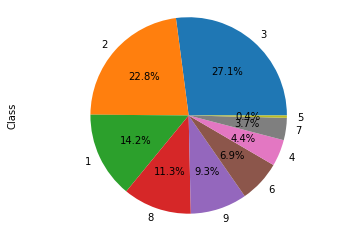

In [5]:
Y['Class'].value_counts().plot.pie(autopct='%1.1f%%',)
plt.axis('equal')
plt.show()

In [ ]:
files = os.listdir(byte_destination)
filenames = Y['Id'].tolist()
class_y = Y['Class'].tolist()
class_bytes = []
sizebytes = []
fnames = []
for file in files:
  
    statinfo = os.stat(os.path.join(byte_destination, file))
    
    file = file.split('.')[0]
    if any(file == filename for filename in filenames):
        i = filenames.index(file)
        class_bytes.append(class_y[i])
        # Converting into Mb's
        sizebytes.append(statinfo.st_size/(1024.0 * 1024.0))
        fnames.append(file)
data_size_byte = pd.DataFrame({'ID':fnames,'size':sizebytes,'Class':class_bytes})

data_size_byte.to_csv('file_size.csv', encoding='utf-8', index=False)
print (data_size_byte.head())

                     ID      size  Class
0  01azqd4InC7m9JpocGv5  5.012695      9
1  01IsoiSMh5gxyDYTl4CB  6.556152      2
2  01jsnpXSAlgw6aPeDxrU  4.602051      9
3  01kcPWA9K2BOxQeS5Rju  0.679688      1
4  01SuzwMJEIXsK7A8dQbl  0.438965      8


In [9]:
#byte_delete=os.listdir(byte_destination)[200:]  
#for file in byte_delete:
    #os.remove(os.path.join(byte_destination, file))

In [17]:
files = os.listdir(byte_destination)
filenames = []
array = []
for file in files:
    if(file.endswith("bytes")):
        file = file.split('.')[0]
        text_file = open (os.path.join(byte_destination, file) + ".txt", 'w+')
        
        with open(os.path.join(byte_destination, file) + ".bytes", "r") as fp:
            lines = ""
            for line in fp:
                a = line.rstrip().split(" ")[1:]
                b = ' '.join(a)
                b = b + "\n"
                text_file.write(b)
            fp.close()
            os.remove(os.path.join(byte_destination, file) + ".bytes")
        text_file.close()

files = os.listdir(byte_destination)
filenames2 = []
feature_matrix = np.zeros((len(files), 257),dtype=int)
k = 0

# Program to convert into bag of words of bytefiles
# This is custom-built bag of words this is unigram bag of words
byte_feature_file = open('result1.csv','w+')
byte_feature_file.write("ID,0,1,2,3,4,5,6,7,8,9,0a,0b,0c,0d,0e,0f,10,11,12,13,14,15,16,17,18,19,1a,1b,1c,1d,1e,1f,20,21,22,23,24,25,26,27,28,29,2a,2b,2c,2d,2e,2f,30,31,32,33,34,35,36,37,38,39,3a,3b,3c,3d,3e,3f,40,41,42,43,44,45,46,47,48,49,4a,4b,4c,4d,4e,4f,50,51,52,53,54,55,56,57,58,59,5a,5b,5c,5d,5e,5f,60,61,62,63,64,65,66,67,68,69,6a,6b,6c,6d,6e,6f,70,71,72,73,74,75,76,77,78,79,7a,7b,7c,7d,7e,7f,80,81,82,83,84,85,86,87,88,89,8a,8b,8c,8d,8e,8f,90,91,92,93,94,95,96,97,98,99,9a,9b,9c,9d,9e,9f,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,aa,ab,ac,ad,ae,af,b0,b1,b2,b3,b4,b5,b6,b7,b8,b9,ba,bb,bc,bd,be,bf,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,ca,cb,cc,cd,ce,cf,d0,d1,d2,d3,d4,d5,d6,d7,d8,d9,da,db,dc,dd,de,df,e0,e1,e2,e3,e4,e5,e6,e7,e8,e9,ea,eb,ec,ed,ee,ef,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,fa,fb,fc,fd,fe,ff,??")

byte_feature_file.write("\n")

for file in files:
    filenames2.append(file)
    byte_feature_file.write(file + ",")
    if(file.endswith("txt")):
        try:
            with open(os.path.join(byte_destination, file), "r") as byte_file:
                for lines in byte_file:
                    line = lines.rstrip().split(" ")
                    for hex_code in line:
                        if hex_code == '??': feature_matrix[k][256] += 1
                        else: feature_matrix[k][int(hex_code,16)] += 1
            byte_file.close()
        except OSError as e:
            print('Error:', e)
            continue
    for i in feature_matrix[k]:
        byte_feature_file.write(str(i) + ",")
    byte_feature_file.write("\n")
    k += 1

byte_feature_file.close()

In [18]:
byte_features = pd.read_csv("result1.csv", sep=",", index_col=False)
byte_features['ID']  = byte_features['ID'].str.split('.').str[0]
byte_features.head()

,ID,0,1,2,3,4,5,6,7,8,...,f7,f8,f9,fa,fb,fc,fd,fe,ff,??
0,01azqd4InC7m9JpocGv5,601905,3905,2816,3832,3345,3242,3650,3201,2965,...,2804,3687,3101,3211,3097,2758,3099,2759,5753,1824
1,01IsoiSMh5gxyDYTl4CB,39755,8337,7249,7186,8663,6844,8420,7589,9291,...,451,6536,439,281,302,7639,518,17001,54902,8588
2,01jsnpXSAlgw6aPeDxrU,93506,9542,2568,2438,8925,9330,9007,2342,9107,...,2325,2358,2242,2885,2863,2471,2786,2680,49144,468
3,01kcPWA9K2BOxQeS5Rju,21091,1213,726,817,1257,625,550,523,1078,...,478,873,485,462,516,1133,471,761,7998,13940
4,01SuzwMJEIXsK7A8dQbl,19764,710,302,433,559,410,262,249,422,...,847,947,350,209,239,653,221,242,2199,9008


In [19]:
result = pd.merge(byte_features, data_size_byte, on = 'ID', how = 'left')
result.head()

,ID,0,1,2,3,4,5,6,7,8,...,f9,fa,fb,fc,fd,fe,ff,??,size,Class
0,01azqd4InC7m9JpocGv5,601905,3905,2816,3832,3345,3242,3650,3201,2965,...,3101,3211,3097,2758,3099,2759,5753,1824,5.012695,9
1,01IsoiSMh5gxyDYTl4CB,39755,8337,7249,7186,8663,6844,8420,7589,9291,...,439,281,302,7639,518,17001,54902,8588,6.556152,2
2,01jsnpXSAlgw6aPeDxrU,93506,9542,2568,2438,8925,9330,9007,2342,9107,...,2242,2885,2863,2471,2786,2680,49144,468,4.602051,9
3,01kcPWA9K2BOxQeS5Rju,21091,1213,726,817,1257,625,550,523,1078,...,485,462,516,1133,471,761,7998,13940,0.679688,1
4,01SuzwMJEIXsK7A8dQbl,19764,710,302,433,559,410,262,249,422,...,350,209,239,653,221,242,2199,9008,0.438965,8


In [20]:
def normalize(df):
    result1 = df.copy()
    for feature_name in df.columns:
        if (str(feature_name) != str('ID') and str(feature_name)!=str('Class')):
            max_value = df[feature_name].max()
            min_value = df[feature_name].min()
            result1[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result1
result = normalize(result)

In [21]:
data_y = result['Class']
result.head()

,ID,0,1,2,3,4,5,6,7,8,...,f9,fa,fb,fc,fd,fe,ff,??,size,Class
0,01azqd4InC7m9JpocGv5,0.262806,0.005498,0.001567,0.002067,0.002048,0.001835,0.002058,0.002946,0.002638,...,0.013560,0.013107,0.013634,0.031724,0.014549,0.014348,0.007843,0.000129,0.092219,9
1,01IsoiSMh5gxyDYTl4CB,0.017358,0.011737,0.004033,0.003876,0.005303,0.003873,0.004747,0.006984,0.008267,...,0.001920,0.001147,0.001329,0.087867,0.002432,0.088411,0.074851,0.000606,0.121237,2
2,01jsnpXSAlgw6aPeDxrU,0.040827,0.013434,0.001429,0.001315,0.005464,0.005280,0.005078,0.002155,0.008104,...,0.009804,0.011777,0.012604,0.028423,0.013080,0.013937,0.067001,0.000033,0.084499,9
3,01kcPWA9K2BOxQeS5Rju,0.009209,0.001708,0.000404,0.000441,0.000770,0.000354,0.000310,0.000481,0.000959,...,0.002121,0.001886,0.002272,0.013032,0.002211,0.003957,0.010904,0.000984,0.010759,1
4,01SuzwMJEIXsK7A8dQbl,0.008629,0.001000,0.000168,0.000234,0.000342,0.000232,0.000148,0.000229,0.000376,...,0.001530,0.000853,0.001052,0.007511,0.001038,0.001258,0.002998,0.000636,0.006233,8


In [22]:
!pip install sklearn --quiet

You should consider upgrading via the 'C:\Users\Razaq\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [23]:
!pip install keras --quiet
!pip install Tensorflow

You should consider upgrading via the 'C:\Users\Razaq\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\Razaq\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [24]:
!pip install mlxtend

You should consider upgrading via the 'C:\Users\Razaq\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [25]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop

In [26]:
# Sklearn Imports
from sklearn import preprocessing
from sklearn.manifold import TSNE
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from keras.utils.np_utils import to_categorical
from mlxtend.plotting import plot_confusion_matrix

In [27]:
result = result.drop(['ID'], axis = 1)


X = result.iloc[:, :-1]
y = result.iloc[:, -1]

In [28]:
cat_y = to_categorical(y)

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, cat_y, test_size=0.30)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7605, 258)
(7605, 10)
(3260, 258)
(3260, 10)


In [105]:
model = Sequential()

model.add(Dense(30, input_shape = (258,), activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(15, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(10, activation = "softmax"))

model.compile(Adam(lr = 0.01), "categorical_crossentropy", metrics = ["accuracy"])

C:\Users\Razaq\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [106]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 30)                7770      
                                                                 
 dropout_15 (Dropout)        (None, 30)                0         
                                                                 
 dense_23 (Dense)            (None, 15)                465       
                                                                 
 dropout_16 (Dropout)        (None, 15)                0         
                                                                 
 dense_24 (Dense)            (None, 10)                160       
                                                                 
Total params: 8,395
Trainable params: 8,395
Non-trainable params: 0
_________________________________________________________________


In [107]:
history = model.fit(X_train, y_train, batch_size=100, epochs=30,
                    validation_data=(X_test, y_test), verbose=1)

Epoch 1/30
77/77 [==============================] - 1s 4ms/step - loss: 1.3876 - accuracy: 0.5157 - val_loss: 0.9159 - val_accuracy: 0.6215
Epoch 2/30
77/77 [==============================] - 0s 2ms/step - loss: 0.9165 - accuracy: 0.6853 - val_loss: 0.7393 - val_accuracy: 0.7328
Epoch 3/30
77/77 [==============================] - 0s 2ms/step - loss: 0.7877 - accuracy: 0.7306 - val_loss: 0.6652 - val_accuracy: 0.7724
Epoch 4/30
77/77 [==============================] - 0s 2ms/step - loss: 0.7071 - accuracy: 0.7649 - val_loss: 0.5857 - val_accuracy: 0.8107
Epoch 5/30
77/77 [==============================] - 0s 2ms/step - loss: 0.6487 - accuracy: 0.7899 - val_loss: 0.5408 - val_accuracy: 0.8255
Epoch 6/30
77/77 [==============================] - 0s 2ms/step - loss: 0.6108 - accuracy: 0.8097 - val_loss: 0.5006 - val_accuracy: 0.8592
Epoch 7/30
77/77 [==============================] - 0s 2ms/step - loss: 0.5623 - accuracy: 0.8259 - val_loss: 0.4969 - val_accuracy: 0.8353
Epoch 8/30
77/77 [==

In [108]:

from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
y_pred_class = np.argmax(y_pred, axis=1)

y_test_class = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test_class, y_pred_class)

In [109]:
print(cm)

[[420   1   0   1   0  10   0   6   4]
 [ 13 712   3   3   0   5   1   7   6]
 [  0   0 890   0   0   0   0   0   0]
 [  2   0   0 135   0   1   0   0   0]
 [  1   0   0   1   0   0   7   1   1]
 [ 10   0   3   6   0 193   1   8   6]
 [  5   1   0   0   0   2 103   0   0]
 [ 17   1   0   5   0   8   0 342   3]
 [ 12   6   1   0   0   0   0   4 292]]


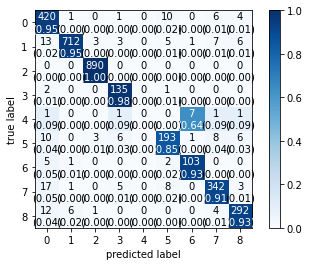

In [110]:
#cm = confusion_matrix(y_test, y_test_pred)

plot_confusion_matrix(conf_mat=cm,
                      show_absolute=True,
                      show_normed=True,
                      colorbar=True)
plt.savefig("confusion_matrix.png")
plt.show()

In [111]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP+TN) /(TP+FP+TN+FN)

print('Accuracy of the binary classification = ', accuracy)

True Positive(TP)  =  [420. 712. 890. 135.   0. 193. 103. 342. 292.]
False Positive(FP) =  [60.  9.  7. 16.  0. 26.  9. 26. 20.]
True Negative(TN)  =  [2758. 2501. 2363. 3106. 3249. 3007. 3140. 2858. 2925.]
False Negative(FN) =  [22. 38.  0.  3. 11. 34.  8. 34. 23.]
Accuracy of the binary classification =  [0.97484663 0.98558282 0.99785276 0.99417178 0.99662577 0.98159509
 0.99478528 0.98159509 0.98680982]


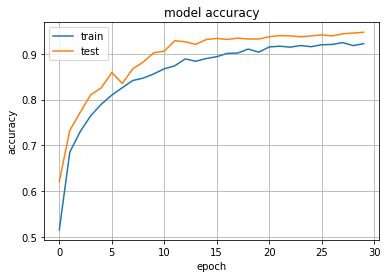

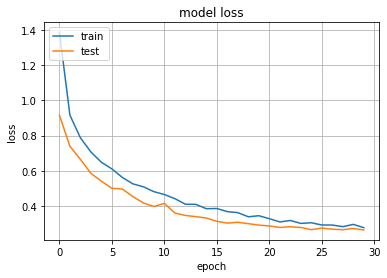

In [112]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.savefig("accuracy.png")
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.savefig("loss.png")
plt.show()